# Program which uses Dropout layers

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons

In [2]:
x, y = make_moons(n_samples=100, noise=0.25, random_state=2)

[]

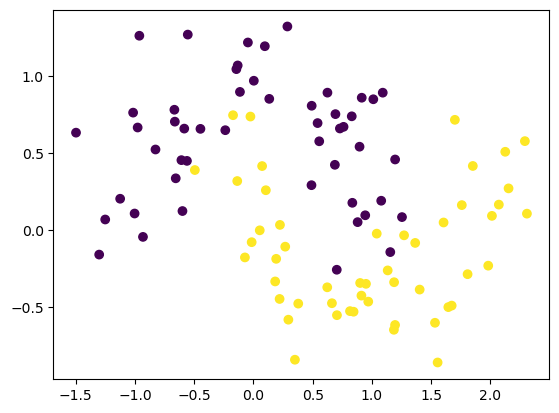

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y)
plt.plot()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout, Dense
from keras.models import Sequential

model = Sequential([
    Dense(128, input_dim=2, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x, y, epochs=200, batch_size=100, validation_split=0.25, verbose=0)

9600/9600 [==============================] - 15s 2ms/step


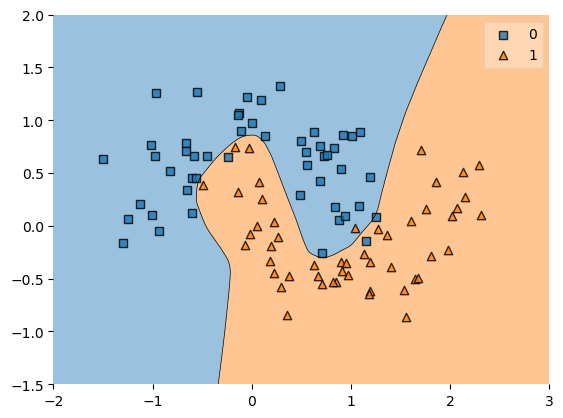

In [6]:
from mlxtend.plotting import plot_decision_regions
#help(plot_decision_regions)
plot_decision_regions(x, y.astype('int'), clf=model)
plt.xlim(-2,3)
plt.ylim(-1.5, 2)
plt.show()

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

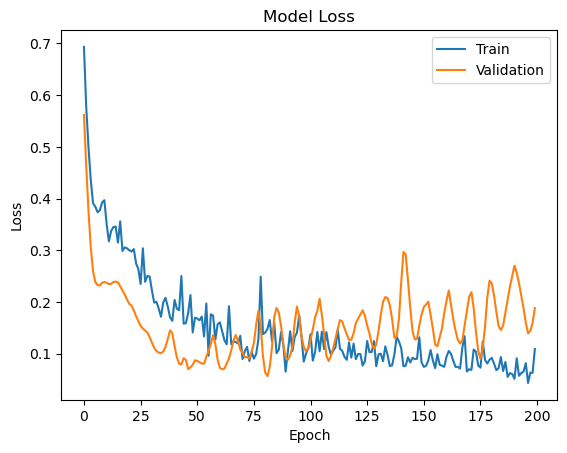

In [8]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [9]:
print(f"Accuracy: {history.history['accuracy'][-1]*100}%")

Accuracy: 94.66666579246521%
